<a href="https://colab.research.google.com/github/acubillosunal/UBM-DEEP-LEARNING-1/blob/main/U2.12%20-%20Vanishing%20gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [2]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

2024-03-22 11:48:47.496491: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 11:48:47.546351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 11:48:47.546381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 11:48:47.547815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 11:48:47.555024: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 11:48:47.555722: I tensorflow/core/platform/cpu_feature_guard.cc:1

'2.15.0'

forward/back propagation calculations https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c

Vanishing gradient example: https://github.com/harinisuresh/VanishingGradient/blob/master/Vanishing%20Gradient%20Example.ipynb

https://adventuresinmachinelearning.com/vanishing-gradient-problem-tensorflow/

In [3]:
from IPython.core.display import display, HTML
from IPython.display import Image

display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_89108/426989491.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

%matplotlib inline

## **Backpropagation**



El backpropagation es una parte esencial del entrenamiento de redes neuronales modernas, ya que permite que estos sofisticados algoritmos aprendan de los conjuntos de datos de entrenamiento y mejoren con el tiempo.

Comprender y dominar el algoritmo de backpropagation es crucial para cualquier persona en el campo de las redes neuronales y el aprendizaje profundo. 

¿Qué es el backpropagation?
Introducido en la década de 1970, el algoritmo de backpropagation es el método para ajustar los pesos de una red neuronal con respecto a la tasa de error obtenida en la iteración o época anterior, y este es un método estándar para entrenar redes neuronales artificiales.

Se puede considerar como un sistema de retroalimentación en el que, después de cada ronda de capacitación o "época", la red revisa su desempeño en las tareas. Calcula la diferencia entre su resultado y la respuesta correcta, conocida como error. Luego, ajusta sus parámetros internos, o "pesos", para reducir este error la próxima vez. Este método es esencial para ajustar la precisión de la red neuronal y es una estrategia fundamental para aprender a hacer mejores predicciones o decisiones.

In [32]:
Image(url='https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif')


En general, existen cuatro pasos principales en el algoritmo de backpropagation:

* Pas hacia adelante
* Cálculo de errores
* Paso hacia atrás
* Actualización de pesos

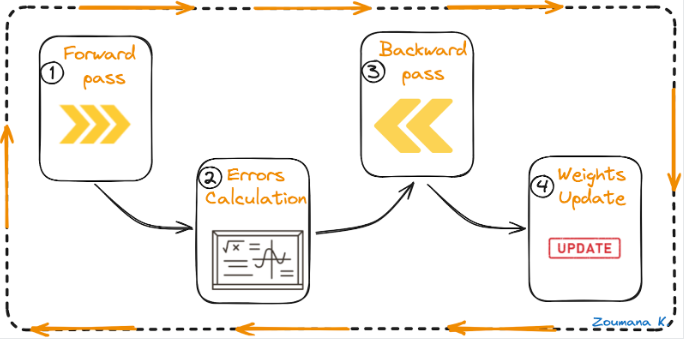

In [33]:
Image(filename = 'local/imgs/backpropagation_flow.png')

### **Foward pass**

Este es el primer paso del proceso de retropropagación y se ilustra a continuación:

* Los datos (entradas X1 y X2) se envían a la capa de entrada.
* Luego, cada entrada se multiplica por su peso correspondiente y los resultados se pasan a las neuronas N1X y N2X de las capas ocultas.
* Esas neuronas aplican una función de activación a las entradas ponderadas que reciben y el resultado pasa a la siguiente capa.

### **Errors calculation**

* El proceso continúa hasta que la capa de salida genera la salida final (o/p).
* Luego, la salida de la red se compara con el valor real (salida deseada) y se calcula la diferencia, lo que da como resultado un valor de error.

### **Backward pass**

Este es un paso de propagación hacia atrás real y no se puede realizar sin los pasos anteriores de cálculo de errores y avance. Así es como funciona:

* El valor de error obtenido anteriormente se utiliza para calcular el gradiente de la función de pérdida.
* El gradiente del error se propaga a través de la red, comenzando desde la capa de salida hasta las capas ocultas.
* A medida que el gradiente de error se propaga hacia atrás, los pesos (representados por las líneas que conectan los nodos) se actualizan según su contribución al error. 
* Esto implica tomar la derivada del error con respecto a cada peso, lo que indica cuánto cambiaría el error un cambio en el peso.
* La tasa de aprendizaje determina el tamaño de las actualizaciones de peso. Una tasa de aprendizaje menor significa que las ponderaciones se actualizan en una cantidad menor y viceversa.

### **Weight update**

* Los pesos se actualizan en la dirección opuesta al gradiente, lo que da lugar al nombre "descenso de gradiente". Su objetivo es reducir el error en el siguiente pase hacia adelante.
* Este proceso de paso hacia adelante, cálculo de errores, paso hacia atrás y actualización de pesos continúa durante múltiples épocas hasta que el rendimiento de la red alcanza un nivel satisfactorio o deja de mejorar significativamente.

### **Ventajas del backpropagation**

El backpropagation es una técnica fundamental en el entrenamiento de redes neuronales, que es ampliamente apreciada por su implementación sencilla, simplicidad en la programación y aplicación versátil en múltiples arquitecturas de red.

Ahora, analicemos cada uno de los beneficios mencionados anteriormente:

* **Facilidad de implementación**: accesible a través de múltiples bibliotecas de aprendizaje profundo como Pytorch y Keras, facilitando su uso en diversas aplicaciones.
* **Simplicidad de programación**: codificación simplificada con abstracción de marco, lo que reduce la necesidad de matemáticas complejas.
* **Flexibilidad**: adaptable a diversas arquitecturas, adecuado para un amplio espectro de desafíos de IA.

### **Limitaciones y desafios**

A pesar del éxito del algoritmo de retropropagación, no está exento de limitaciones que pueden afectar la eficiencia y eficacia del proceso de entrenamiento de una red neuronal. Exploremos algunas de esas limitaciones:

* **Calidad de los datos:** la mala calidad de los datos, incluido el ruido, la información incompleta o el sesgo, puede dar lugar a modelos inexactos, ya que la retropropagación aprende exactamente lo que se le proporciona.
* **Duración del entrenamiento:** la retropropagación a menudo requiere un tiempo de entrenamiento extenso, lo que puede resultar poco práctico cuando se trata de redes grandes.
* **Complejidad basada en matrices:** las operaciones matriciales en retropropagación escalan con el tamaño de la red, lo que aumenta la demanda computacional y potencialmente supera los recursos disponibles.

## **implementando el backpropagation**



In [5]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print("Training data")
print(f"- X = {train_images.shape}, y = {train_labels.shape}")
print(f"- Hols {train_images.shape[0]/70000* 100}% of the overall data")

print("\n")

print("Testing data")
print(f"- X = {test_images.shape}, y = {test_labels.shape}")
print(f"- Hols {test_images.shape[0]/70000* 100}% of the overall data")

Training data
- X = (60000, 28, 28), y = (60000,)
- Hols 85.71428571428571% of the overall data


Testing data
- X = (10000, 28, 28), y = (10000,)
- Hols 14.285714285714285% of the overall data


In [7]:
import numpy as np

import random
def plot_images(nb_images_to_plot, train_data):

	# Generate a list of random indices from the training data
	random_indices = random.sample(range(len(train_data)), nb_images_to_plot)

	# Plot each image using the random indices
	for i, idx in enumerate(random_indices):
		plt.subplot(330 + 1 + i)
		plt.imshow(train_data[idx], cmap=plt.get_cmap('gray'))

	plt.show()

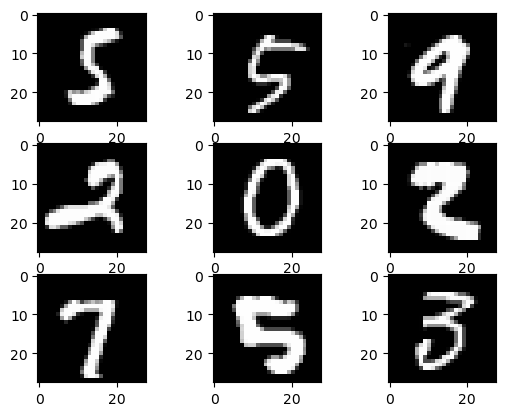

In [10]:
nb_images_to_plot = 9
plot_images(nb_images_to_plot, train_images)

In [11]:
def plot_labels_distribution(data_labels):
    
	counts = np.bincount(data_labels)

	fig, ax = plt.subplots(figsize=(10,5))
	ax.bar(range(10), counts, width=0.8, align='center')
	ax.set(xticks=range(10), xlim=[-1, 10], title='Training data distribution')

	plt.show()

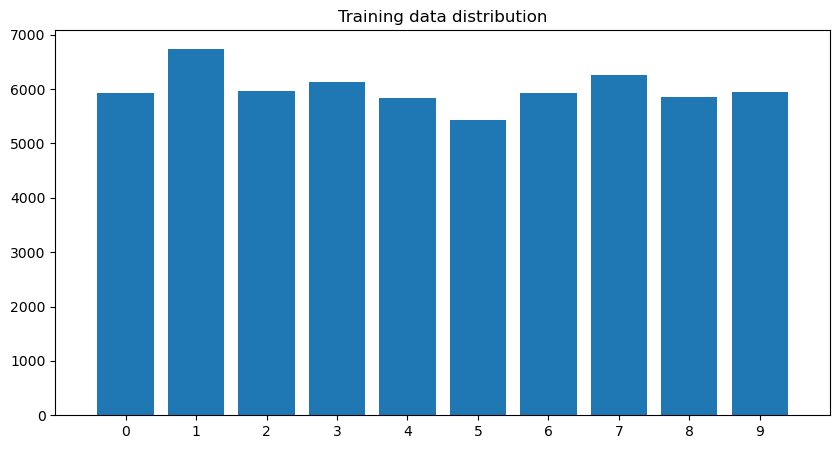

In [14]:
plot_labels_distribution(train_labels)

In [15]:
from keras.utils import to_categorical

def preprocess_data(data, label,
                	vector_size,
                	grayscale_size):
    
	# Normalize to range 0-1
	preprocessed_images = data.reshape((data.shape[0],
                             	vector_size)).astype('float32') / grayscale_size
    
	# One-hot encode the labels
	encoded_labels = to_categorical(label)
    
	return preprocessed_images, encoded_labels

In [16]:
# Flattening variable
vector_size = 28 * 28

grayscale_size = 255
train_size = train_images.shape[0]
test_size = test_images.shape[0]

# Preprocessing of the training data
train_images, train_labels = preprocess_data(train_images,
                                         	train_labels,
                                         	vector_size,
                                         	grayscale_size)

# Preprocessing of the testing data
test_images, test_labels = preprocess_data(test_images,
                                       	test_labels,
                                       	vector_size,
                                       	grayscale_size)

In [17]:
print("Training data")
print(f"- Maxium Value {train_images.max()} ")
print(f"- Minimum Value {train_images.min()} ")

print("\n")

print("Testing data")
print(f"- Maxium Value {test_images.max()} ")
print(f"- Minimum Value {test_images.min()} ")

Training data
- Maxium Value 1.0 
- Minimum Value 0.0 


Testing data
- Maxium Value 1.0 
- Minimum Value 0.0 


In [18]:
# One hot encoding of the test data labels
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
# One hot encoding of the train data labels
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
from keras import models
from keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization 

In [21]:
hidden_units = 256
nb_unique_labels = 10
vector_size = 784  # Assuming a 28x28 input image for example

def define_network_architecture():

	network = models.Sequential()
	network.add(Dense(vector_size, activation='relu', input_shape=(vector_size,)))  # Input layer
	network.add(Dense(512, activation='relu'))                       	# Hidden layer
	network.add(Dense(nb_unique_labels, activation='softmax'))  

	return network

In [22]:
network = define_network_architecture()

2024-03-22 12:34:02.688602: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-22 12:34:02.689868: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


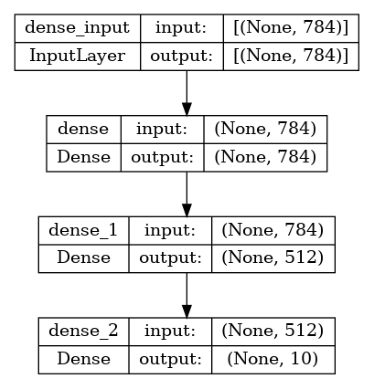

In [23]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plot_model(network, to_file='network_architecture.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

img = mpimg.imread('network_architecture.png')
plt.imshow(img)
plt.axis('off')
plt.show()


In [24]:
network.compile(optimizer='rmsprop',
            	loss='categorical_crossentropy',
            	metrics=['accuracy'])

In [25]:
# Fit the model
batch_size = 256
n_epochs = 15
val_split = 0.2
patience_value = 5

# Fit the model with the callback
history = network.fit(train_images, train_labels, validation_split=val_split,
        	epochs=n_epochs, batch_size=batch_size)

Epoch 1/15


2024-03-22 12:35:22.419080: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


187/188 [============================>.] - ETA: 0s - loss: 0.3135 - accuracy: 0.9028

2024-03-22 12:35:26.136149: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


188/188 [==============================] - 4s 19ms/step - loss: 0.3130 - accuracy: 0.9030 - val_loss: 0.1392 - val_accuracy: 0.9569
Epoch 2/15
188/188 [==============================] - 3s 18ms/step - loss: 0.1066 - accuracy: 0.9666 - val_loss: 0.1415 - val_accuracy: 0.9562
Epoch 3/15
188/188 [==============================] - 4s 19ms/step - loss: 0.0660 - accuracy: 0.9792 - val_loss: 0.0843 - val_accuracy: 0.9751
Epoch 4/15
188/188 [==============================] - 3s 19ms/step - loss: 0.0436 - accuracy: 0.9861 - val_loss: 0.0900 - val_accuracy: 0.9730
Epoch 5/15
188/188 [==============================] - 3s 17ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0799 - val_accuracy: 0.9783
Epoch 6/15
188/188 [==============================] - 3s 17ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.1216 - val_accuracy: 0.9668
Epoch 7/15
188/188 [==============================] - 3s 18ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0973 - val_accuracy: 0.9763
Epoch 8/15

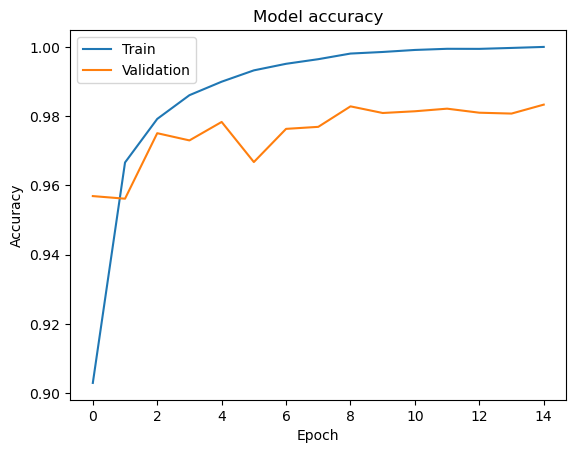

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
loss, acc = network.evaluate(test_images,
                         	test_labels, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))

20/40 [==============>...............] - ETA: 0s - loss: 0.0957 - accuracy: 0.9811

2024-03-22 12:36:34.690426: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


40/40 [==============================] - 0s 7ms/step - loss: 0.0718 - accuracy: 0.9850

Test accuracy: 98.5%
